#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 218191552

# Student name: Pradeep Thapa

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [3]:
# load dataset
weather_df = pd.read_csv('weather_dataset.csv')

# print dataset
weather_df

,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.02,26.02,0.43,11.00,31,16.10,0,1014.36
96449,2016-09-09 20:00:00.000 +0200,rain,24.58,24.58,0.48,10.09,20,15.55,0,1015.16
96450,2016-09-09 21:00:00.000 +0200,rain,22.04,22.04,0.56,8.98,30,16.10,0,1015.66
96451,2016-09-09 22:00:00.000 +0200,rain,21.52,21.52,0.60,10.53,20,16.10,0,1015.95


In [4]:
# check missing values
print(f'There are {np.sum(weather_df.isnull().sum())} missing values in the dataset.')

There are 0 missing values in the dataset.


In [5]:
# copy main dataframe
df = weather_df.copy()

# make date column
df['date'] =  df['recording_date_time'].str.slice(start=0, stop=10, step=1)

In [6]:
# convert to date format
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d", errors='raise')

**Pre-Processing categorical columns**
 - Feature column precip_type is categorical so we need to convert to numerical values.
 - Assume there is no order (not ordinal) in precip_type, we need to one hot encode the values.

In [7]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['precip_type'], prefix='precip_type')],axis=1)

# drop original column
df.drop(['precip_type'],axis=1, inplace=True)

**Drop column**<br>
- Column 'cloud_cover' has same value (0) across all rows so it can be dropped.

In [8]:
# unique values on cloud_cover column
df['cloud_cover'].unique() # returns [0]

# drop cloud_cover column
df.drop(['cloud_cover'],axis=1, inplace=True)

df

,recording_date_time,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure,date,precip_type_rain,precip_type_snow
0,2006-04-01 00:00:00.000 +0200,9.47,7.39,0.89,14.12,251,15.83,1015.13,2006-04-01,1,0
1,2006-04-01 01:00:00.000 +0200,9.36,7.23,0.86,14.26,259,15.83,1015.63,2006-04-01,1,0
2,2006-04-01 02:00:00.000 +0200,9.38,9.38,0.89,3.93,204,14.96,1015.94,2006-04-01,1,0
3,2006-04-01 03:00:00.000 +0200,8.29,5.94,0.83,14.10,269,15.83,1016.41,2006-04-01,1,0
4,2006-04-01 04:00:00.000 +0200,8.76,6.98,0.83,11.04,259,15.83,1016.51,2006-04-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.02,26.02,0.43,11.00,31,16.10,1014.36,2016-09-09,1,0
96449,2016-09-09 20:00:00.000 +0200,24.58,24.58,0.48,10.09,20,15.55,1015.16,2016-09-09,1,0
96450,2016-09-09 21:00:00.000 +0200,22.04,22.04,0.56,8.98,30,16.10,1015.66,2016-09-09,1,0
96451,2016-09-09 22:00:00.000 +0200,21.52,21.52,0.60,10.53,20,16.10,1015.95,2016-09-09,1,0


In [9]:
# split train test data
train_ds = df[pd.to_datetime(df.date) < '2015-01-01'] # before 2015
test_ds = df[pd.to_datetime(df.date) >= '2015-01-01']

# shuffle the training data
train_ds = shuffle(train_ds, random_state=0)

In [10]:
# exclude recording_date_time column from both training and test sets
del train_ds['date']
del test_ds ['date']
del train_ds['recording_date_time']
del test_ds['recording_date_time']

# Display the shape of training and test sets
train_shape = train_ds.shape
test_shape = test_ds.shape

print(f'The shape of training is {train_shape}')
print(f'The shape of testing is {test_shape}')

The shape of training is (78909, 9)
The shape of testing is (17544, 9)


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [11]:
# consider temperature as the target
x_train = train_ds.drop(columns=['temperature'])
y_train = train_ds['temperature']

x_test = test_ds.drop(columns=['temperature'])
y_test = test_ds['temperature']

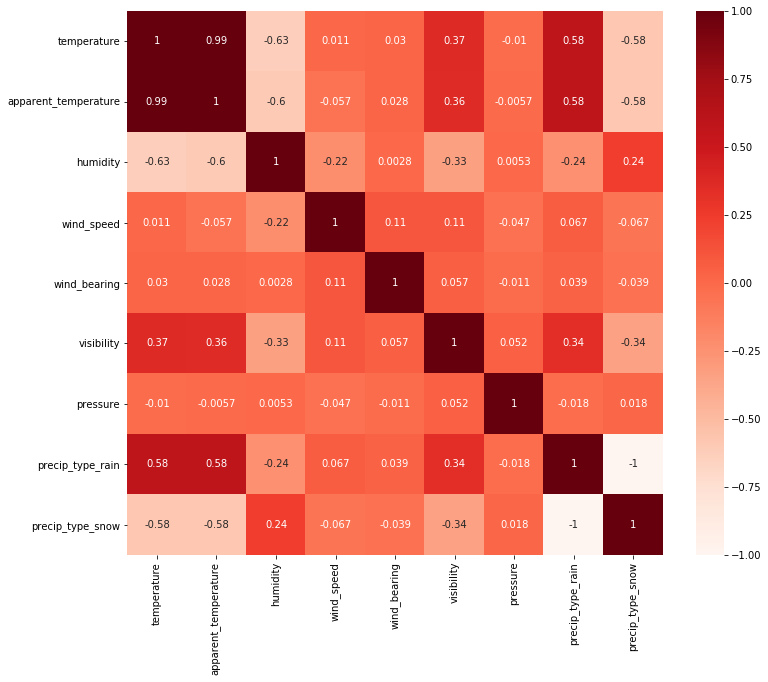

In [12]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_ds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Assumption**
- Select features which has correlation of above 0.5 (taking absolute value) with the output variable temperature.
It is important to take absolute values as negative correlation value impacts the model as well. In other words,
if feature has higher the negative correlation then if it goes downward, the target would go upwards. Similarly, if it has positive, it is vice-versa.

In [13]:
# Correlation with temperature
target = abs(cor["temperature"])
relevant_features = target[target>0.5]
relevant_features

temperature             1.000000
apparent_temperature    0.992413
humidity                0.631635
precip_type_rain        0.578395
precip_type_snow        0.578395
Name: temperature, dtype: float64

**Insignificant features for predicting temperature:**
- wind_speed
- wind_bearing
- visibility
- pressure

**Findings**


I found that the temperature, apparent_temperature, humidity and precip_type features are highly
correlated to temperature. These features either positively or negatively highly correlated as I took the absolute
value to get the highest impacting features for the target variable. Absolute value makes the correlation between 0-1 where 0 is independent
feature and 1 is highly correlated feature (can be both negative or positive).
Feature 'temperature' is highly correlated to itself which is
an obvious. Similarly, apparent_temperature highly impacts the temperature. I used the threshold of 0.5 to limit the features.
The other finding is that not all features contribute equally to the target output. Some features are highly
correlated and some are not at all.

Features such as wind_speed, wind-bearing, visibility and pressure are not highly correlated to temperature. They are below
the threshold of 0.5 correlation value.

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [14]:
# copy x_train and x_test
train_x = x_train.copy()
test_x = x_test.copy()

# important features
important_features = ['apparent_temperature', 'humidity', 'precip_type_rain', 'precip_type_snow']

# numerical features
numerical_col = ['apparent_temperature', 'humidity']

# column transformer
numerical_transform = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numerical_col)
], remainder='passthrough')

# select important features only
train_x = train_x[important_features]
test_x = test_x[important_features]

# build linear regression model
lr = LinearRegression()

# make a pipeline
lr_pipeline = Pipeline([
    ('standard_scaling', numerical_transform),
    ('linear_regression', lr)
])

# train
lr_pipeline.fit(train_x, y_train)

# predict
y_pred = lr_pipeline.predict(test_x)

# evaluate
lr_mae = mean_absolute_error(y_test, y_pred)

# print
print(f'The MAE of the model on test data is {lr_mae:.4f} ')

The MAE of the model on test data is 0.7635 


4. Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [15]:
# Correlation with pressure
pressure_target = abs(cor["pressure"])
pressure_target.sort_values()

humidity                0.005328
apparent_temperature    0.005677
temperature             0.010480
wind_bearing            0.010980
precip_type_rain        0.018172
precip_type_snow        0.018172
wind_speed              0.046858
visibility              0.051819
pressure                1.000000
Name: pressure, dtype: float64

In [16]:
# copy x_train and y_train
train_x_ = x_train.copy()
test_x_ = x_test.copy()

# new features
new_features = ['pressure', 'visibility']

# select features
train_x_ = train_x_[new_features]
test_x_ = test_x_[new_features]

# create model
lr_ = LinearRegression()

# make pipeline with scaling
lr_pipeline_ = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', lr_)
])
lr_pipeline_.fit(train_x_, y_train) # fit the training data

# make prediction
y_pred_ = lr_pipeline_.predict(test_x_)

# evaluate
mae = mean_absolute_error(y_test, y_pred_)

# print
print(f'The MAE using feature pressure and visibility is {mae:.3f}.')

The MAE using feature pressure and visibility is 6.499.


**Performance Variation**
> The Mean Absolute Error (MAE) for the previously developed model is 0.7635 and for the new simplified model is 6.499. As we can see that the MAE for the simplified model is much higher than the prevously developed model.
This is because the previous model used more features and highly correlated features to our target 'temperature'. However, for the simplified model, we used two features and correlated to 'pressure' feature which is not our target feature.

5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [17]:
'''
:var df, dataframe from above
'''

# drop 'recording_date_time' and 'date' from the table
del df['recording_date_time']
del df['date']

# split featurs and labels
X = df.drop(columns=['temperature'])
y = df['temperature']

In [18]:
'''
Assumption:
 - "Complete dataset into training and test sets, with an 40-60 split" refers to 40% training and 60% testing data split.
'''
# train test split
train_featues, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.6, random_state=100, shuffle=True
)
train_featues.shape, train_labels.shape, test_features.shape, test_labels.shape

((38581, 8), (38581,), (57872, 8), (57872,))

In [19]:
# build model
l_reg = LinearRegression()

# numerical columns
numerical_cols = ['apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility', 'pressure']

# column transformer
num_transform = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

# build pipeline
l_reg_pipeline = Pipeline([
    ('scaler', num_transform),
    ('linear_reg', l_reg)
])

# train with training data
l_reg_pipeline.fit(train_featues, train_labels) 

# predict
y_hat = l_reg_pipeline.predict(test_features)

# evaluate
l_reg_mae = mean_absolute_error(y_hat, test_labels)

# print MAE
print(f'The MAE is {l_reg_mae:.4f}')

The MAE is 0.7401


I am using **Lasso Regression** as it uses shrinkage. This regularization helps to select variables as we have high levels of multicollinearity. All of these features do not contribute to target feature as we have seen Pearson's correlation heatmap. This technique can shrink coefficient to 0 of features which do not contribute to make prediction.
Also, we have not done any feature selection for this data so this regularization can automate the feature selection process.

In [20]:
'''
Create an optimal regularised linear regression model and report the test performance.
'''
# alpha values to check
params = {
    'lr_reg__alpha': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1]
}

# numerical columns
numerical_cols = ['apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility', 'pressure']

# column transformer
num_transform = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

# build model
lr_reg = Lasso(random_state=33)

# make pipeline
lr_reg_pipeline = Pipeline([
    ('scaler', num_transform),
    ('lr_reg', lr_reg)
])

# grid search builder
gridsearch = GridSearchCV(lr_reg_pipeline, param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=1)

# train grid search
gridsearch.fit(train_featues, train_labels)

# get best params
print(f'Best Param: {gridsearch.best_params_}')
print(f'Best Score: {gridsearch.best_score_}')

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Param: {'lr_reg__alpha': 0.01}
Best Score: -0.7439951795836595


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.2s finished


Now we have found our best value for alpha using grid search. We can use this value to build a regularized regression model.

In [21]:
# build model
optimal_lr_reg = Lasso(alpha=0.01, random_state=33)

# numerical columns
numerical_cols = ['apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing', 'visibility', 'pressure']

# column transformer
num_transform = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

# make pipeline
optimal_lr_reg_pipeline = Pipeline([
    ('scaler', num_transform),
    ('lr_reg', optimal_lr_reg)
])

# train grid search
optimal_lr_reg_pipeline.fit(train_featues, train_labels)

# predict
y_hat = optimal_lr_reg_pipeline.predict(test_features)

# evaluate
lr_reg_mae = mean_absolute_error(y_hat, test_labels)

# print MAE
print(f'The new MAE is {lr_reg_mae:.4f}')

The new MAE is 0.7397


In [22]:
# get coefficient for each features
lr_reg_coef = optimal_lr_reg_pipeline.steps[1][1].coef_ # lasso
_lr_reg_coef = l_reg_pipeline.steps[1][1].coef_ # without regularized

# put into the table
columns = test_features.columns.to_list()

# create dataframe
print('Lasso Coefficients:\n')
lasso = pd.DataFrame(lr_reg_coef.reshape(1,8), columns=columns).head(1)
lasso

Lasso Coefficients:



,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure,precip_type_rain,precip_type_snow
0,9.365466,-0.281275,0.545211,-0.032943,0.02696,-0.011902,-0.0,0.0


In [23]:
print('Linear Regression Coefficients:\n')
without_lasso = pd.DataFrame(_lr_reg_coef.reshape(-1,8), columns=columns).head(1)
without_lasso

Linear Regression Coefficients:



,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,pressure,precip_type_rain,precip_type_snow
0,9.382272,-0.278043,0.55769,-0.044766,0.03555,-0.022223,-0.019064,0.019064


**(c) Explain the reason behind the performance variation, if any.**

The linear regression model without any regularization (penalty), MAE is 0.7401 and the model with Lasso regularization is 0.7397. As there is not much different in MAE, but the
coefficients of features are different. As you can see above that the Lasso and Linear Regression coefficients are different for each features. These changes contribute to the performance variation in these two models.
Similarly, Lasso can be used as a feature selection which shows in our coefficient values. For example, precip_type feature is set to 0 coefficient which tells us that it
has no relationship between feature and target. However in our previous linear regression, we can see some coefficient value for precip_type.


##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

No, same target temperature can not be used for logistic regression because logistic regression models a relationship between
predictor variables and categorical response variable. For example, we would use logistic regression
to model the relationship between various type of temperature or range of temperature such as
hot or not hot and greater than 40 degree celsius or not. Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [24]:
# copy dataframe
new_df = weather_df.copy()

# delete recording_date_time
del new_df['recording_date_time']

# drop cloud_cover column as it has same value across all rows (0)
del new_df['cloud_cover']

# convert categorical to numerical
label_encoder = LabelEncoder()
new_df['precip_type'] = label_encoder.fit_transform(new_df['precip_type'])

# split dataset
train_, test_ = train_test_split(
    new_df,
    test_size=0.3,
    random_state=100,
    shuffle=True
)
train_.shape, test_.shape

((67517, 8), (28936, 8))

In [25]:
# split into features and target
_x_train = train_.drop(columns=['precip_type'])
_y_train = train_['precip_type']

_x_test = test_.drop(columns=['precip_type'])
_y_test = test_['precip_type']

In [26]:
# build logistic reg model
log_reg = LogisticRegression(max_iter=100, random_state=100, n_jobs=-1)

# build pipeline
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

# fit the training data
log_reg_pipeline.fit(_x_train, _y_train)

# predict
_y = log_reg_pipeline.predict(_x_test)

# evaluation
acc = accuracy_score(_y_test, _y)
print(f'The accuracy with default threshold (0.5) is {acc*100:.2f}%.')

# threshold
THRESHOLD = 0.45

#  predict with threshold
preds = np.where(log_reg_pipeline.predict_proba(_x_test)[:,1] > THRESHOLD, 1, 0)

# evaluation
thres_acc = accuracy_score(_y_test, preds)
print(f'The accuracy with new threshold (0.45) is {thres_acc*100:.2f}%.')

The accuracy with default threshold (0.5) is 98.37%.
The accuracy with new threshold (0.45) is 98.38%.


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [27]:
# classification report
print(classification_report(_y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25659
           1       0.92      0.93      0.93      3277

    accuracy                           0.98     28936
   macro avg       0.96      0.96      0.96     28936
weighted avg       0.98      0.98      0.98     28936



The model has 98% of accuracy.

The overall *precision* of model is *98%* where class rain has 99% and snow has 92%. The precision gives the ratio of correct positive predictions to the total predicted positives (TP/(TP+FP)).

The overall *recall* of model is *98%* as well where class rain has 99% and snow has 93%. The recall gives the ratio of correct positive predictions to the total positives examples (TP/(TP+FN)).

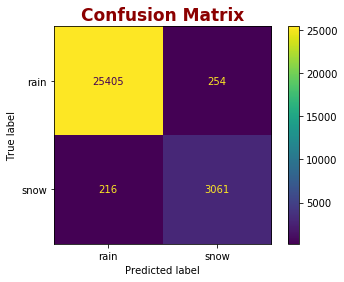

In [30]:
# confusion_matrix
confusion_mtx = confusion_matrix(_y_test, preds)
ConfusionMatrixDisplay(confusion_mtx, display_labels=['rain', 'snow']).plot(values_format='.0f')
plt.title(
    'Confusion Matrix', fontdict={'fontsize':17, 'fontweight':'bold', 'color':'darkred'}
)
plt.show()

A True Positive (TP) is an outcome where the model correctly predicts the positive class. From the confusion matrix, we can clearly see that 25405 samples were correctly identified as rain.

Similarly, a True Negative (TN) is an outcome where the model correctly predicts the negative class. 3061 samples were correctly identified as snow.

A False Positive (FP) is an outcome where the model incorrectly predicts the positive class. 254 samples were identified as false positive as snow instead of rain.

And a False Negative (FN) is an outcome where the model incorrectly predicts the negative class. 216 samples were identified as false negative as those samples were snow but the model predicted rain.

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

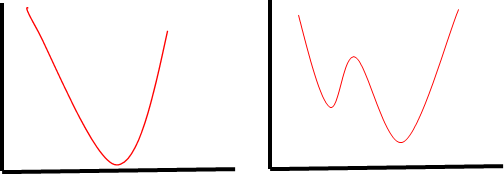





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

* The figure (a) represents the convex objective function because convex function refers to
function that is in the shape of U. Similarly, the local minimum is same as global minimum and it has one global minimum.


b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)
* Maximum number of iteration (max_iter) can help to reach the converge point because this hyperparameter is the  maximum number of iterations taken to converge.
When the maximum number of iterations are not enough, it repeatedly overshoots the target and never gets converged to the minimum point. Also, the lower max_iter value can take longer to converge.
Similarly, when the max_iter is higher, it will cause an increase in the loss as the parameter updates cause the loss to bounce around and even diverge from the minima.

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)
* Figure-b is a non-convex objective function. Non-convex objective function contains multiple local minima, saddle points, very flat regions and widely varying curvature which makes
difficult to optimise.
-  Techniques such as stochastic gradient descent (SGD), mini-batching, stochastic variance-reduced gradient (SVRG), and momentum
can be used to solve non-convex function. To avoid bad local minimum, we can re-optimize the model with different
initialization and/or add extra noise to gradients updates. Similarly, non-convex function has saddle points, to solve this issue
we can find the Hassian and compute gradient descent direction. To avoid getting stuck
in a region of low gradient magnitude, we can use batchnorm or use rectified linear unit (ReLU) as activation function. Again, we might
take larger steps and we might diverge, we can use adaptive step size (learning rate). Also, hyperparameter setting may lead us to diverse so these setting needs to be optimised as well.
Ref: https://mc.ai/non-convex-optimization-in-deep-learning/